In [64]:
#Importing needed libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, naive_bayes
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle

In [3]:
#Loading Datasets
df= pd.read_csv("C:\\Users\\user\\Downloads\\1) iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [11]:
#Define features and target
x = df.drop(columns=["species"])
y = df["species"]

In [7]:
new_col=df.select_dtypes(include=['object']).columns

In [8]:
#Encoding the target
le=LabelEncoder()
for col in new_col:
    le.fit(df[col])
    df[col]=le.transform(df[col])

In [12]:
# Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
#testing and training the target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [16]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred2 = logreg.predict(x_test)

In [18]:
#Accuracy
accuracy_score(y_test, y_pred2)*100

100.0

In [61]:
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(logreg, f)

In [27]:
#Precision and Recall

print("Precision, Recall, F1 Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Precision, Recall, F1 Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



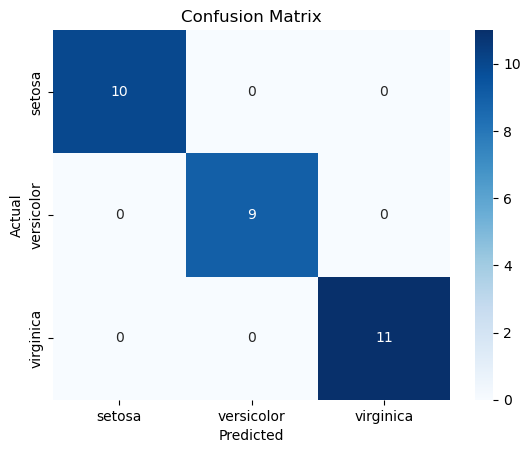

In [29]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

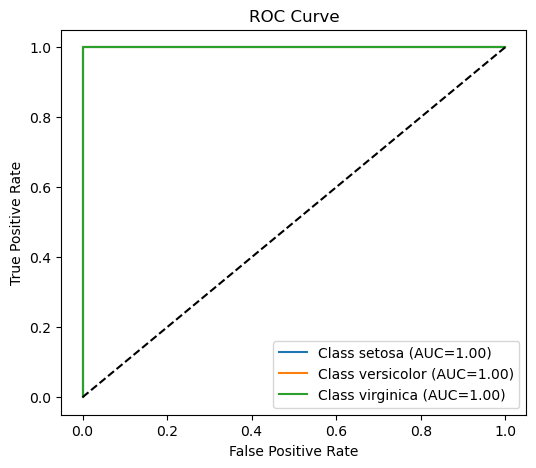

In [32]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = model.predict_proba(x_test)

plt.figure(figsize=(6,5))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"Class {le.classes_[i]} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [38]:
#Comparing Logistic Regression to other classifiers
svm_c = svm.SVC(probability=True)

In [39]:
svm_c.fit(x_train, y_train)

SVC(probability=True)

In [40]:
svm_cpred = svm_c.predict(x_test)

In [41]:
svm_cpred[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [42]:
accuracy_score(y_test,svm_cpred)*100

100.0

In [44]:
#Logistic Regression vs Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42, n_jobs=-1)

In [45]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [48]:
y_pred = rf.predict(x_test)

print("\n=== Random Forest Evaluation ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Random Forest Evaluation ===
Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [63]:
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)


Logistic Regression Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Decision Tree Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 1

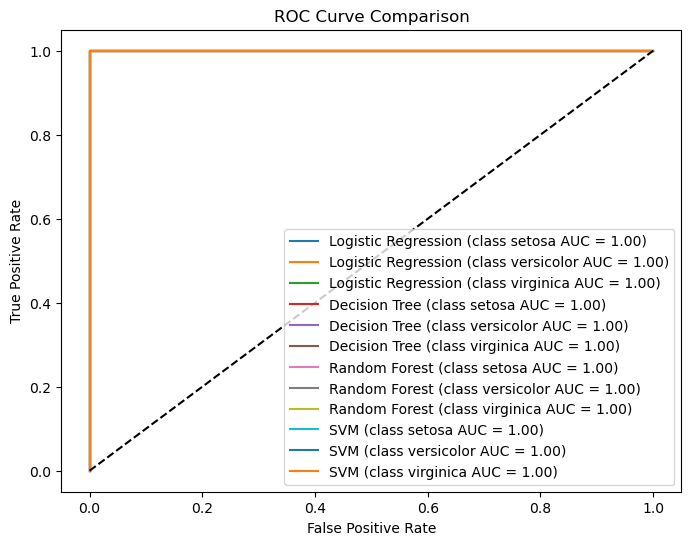


Model Comparison:
                      Accuracy
Logistic Regression       1.0
Decision Tree             1.0
Random Forest             1.0
SVM                       1.0


In [23]:
#Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
   
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: ROC Curve (One-vs-Rest for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_score = model.predict_proba(x_test)
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(3):  # 3 classes
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'{name} (class {le.classes_[i]} AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# Step 6: Results Summary
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
print("\nModel Comparison:\n", results_df)